In [21]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv("Data/city_data.csv")
ride_df = pd.read_csv("Data/ride_data.csv")
# Combine the data into a single dataset
final_df = pd.merge(city_df, ride_df, how="inner", on='city')
# Display the data table for preview
final_df.head(5)
cols = list(final_df.columns.values)
final_df = final_df[['city', 'date','fare','ride_id','driver_count', 'type']]

In [24]:
final_df.head(5)

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


## Bubble Plot of Ride Sharing Data

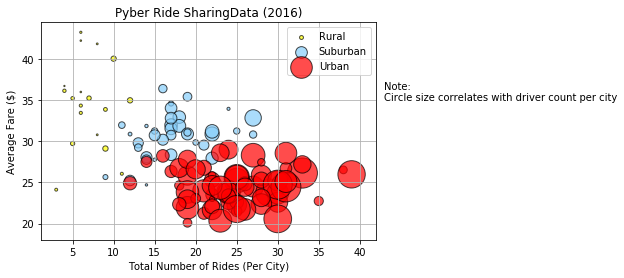

In [36]:
# Obtain the x and y coordinates for each of the three city types
fare_data = final_df.groupby(['type','city'])['fare'].mean()
ride_data = final_df.groupby(['type','city'])['ride_id'].count()
driver_data = final_df.groupby(['type','city'])['driver_count'].sum()


city_type = final_df.groupby(['type','city'], as_index=False)['fare'].mean()
rural_tot = city_type.type.eq('Rural').sum()
suburban_tot = city_type.type.eq('Suburban').sum()
urban_tot = city_type.type.eq('Urban').sum()

color_r = 'yellow'
color_s = 'LightSkyBlue'
color_u = 'red'
bubble_size = 0.4

#Fixing the data for Matplotlib
x_r = [ride_data[x] for x in range(rural_tot)]
y_r = [fare_data[x] for x in range(rural_tot)]
z_r = [float(driver_data[x]) * bubble_size for x in range(rural_tot)]

x_s = [ride_data[x] for x in range(rural_tot,rural_tot + suburban_tot)]
y_s = [fare_data[x] for x in range(rural_tot,rural_tot + suburban_tot)]
z_s = [float(driver_data[x]) * bubble_size for x in range(rural_tot,rural_tot + suburban_tot)]

x_u = [ride_data[x] for x in range(rural_tot + suburban_tot, rural_tot + suburban_tot + urban_tot)]
y_u = [fare_data[x] for x in range(rural_tot + suburban_tot, rural_tot + suburban_tot + urban_tot)]
z_u = [float(driver_data[x]) * bubble_size for x in range(rural_tot + suburban_tot, rural_tot + suburban_tot + urban_tot)]


# Build the scatter plots for each city types
plt.scatter(x_r, y_r, z_r, alpha=0.7, color=color_r, edgecolors='black', label = 'Rural', marker="o")#
plt.scatter(x_s, y_s, z_s, alpha=0.7, color=color_s, edgecolors='black', label = 'Suburban', marker="o")#
plt.scatter(x_u, y_u, z_u, alpha=0.7, color=color_u, edgecolors='black', label = 'Urban', marker="o")#
# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride SharingData (2016)")
plt.grid()
# Create a legend
plt.legend(fontsize = 10)
# Incorporate a text label regarding circle size
plt.text(43,35,'Note:\nCircle size correlates with driver count per city')
# Save Figure
plt.savefig("Ride_Sharing_Data.png")
# Show plot
plt.show()

## Total Fares by City Type

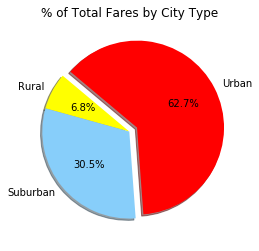

<Figure size 432x288 with 0 Axes>

In [38]:
# Calculate Type Percents
fare_data = final_df.groupby(['type','city'])['fare'].sum()
rural_fare = [fare_data[x] for x in range(rural_tot)]
suburban_fare = [fare_data[x] for x in range(rural_tot,rural_tot + suburban_tot)]
urban_fare = [fare_data[x] for x in range(rural_tot + suburban_tot, rural_tot + suburban_tot + urban_tot)]

labels = ['Rural','Suburban','Urban']
sizes = [sum(rural_fare), sum(suburban_fare), sum(urban_fare),]
explode = (0, 0, 0.1)
colors = [color_r,color_s,color_u]

# Build Pie Chart
plt.title('% of Total Fares by City Type')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()
# Save Figure
plt.savefig("Total_Fares_by_City_Type.png")

## Total Rides by City Type

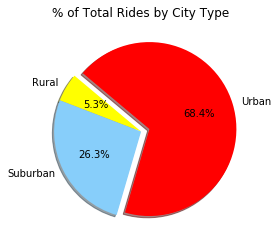

<Figure size 432x288 with 0 Axes>

In [39]:
# Calculate Type Percents
ride_data = final_df.groupby(['type','city'])['ride_id'].count()
rural_ride = [ride_data[x] for x in range(rural_tot)]
suburban_ride = [ride_data[x] for x in range(rural_tot,rural_tot + suburban_tot)]
urban_ride = [ride_data[x] for x in range(rural_tot + suburban_tot, rural_tot + suburban_tot + urban_tot)]

labels = ['Rural','Suburban','Urban']
sizes = [sum(rural_ride), sum(suburban_ride), sum(urban_ride),]
explode = (0, 0, 0.1)
colors = [color_r,color_s,color_u]
# Build Pie Chart
plt.title('% of Total Rides by City Type')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()
# Save Figure
plt.savefig("Total_Rides_by_City_Type.png")

## Total Drivers by City Type

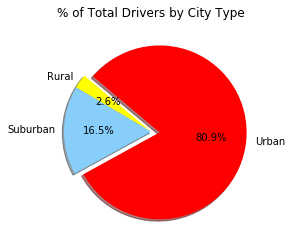

<Figure size 432x288 with 0 Axes>

In [40]:
# Calculate Driver Percents
driver_data = city_df.groupby(['type','city'])['driver_count'].sum()
rural_driver = [driver_data[x] for x in range(rural_tot)]
suburban_driver = [driver_data[x] for x in range(rural_tot,rural_tot + suburban_tot)]
urban_driver = [driver_data[x] for x in range(rural_tot + suburban_tot, rural_tot + suburban_tot + urban_tot)]

labels = ['Rural','Suburban','Urban']
sizes = [sum(rural_driver), sum(suburban_driver), sum(urban_driver),]
explode = (0, 0, 0.1)
colors = [color_r,color_s,color_u]
# Build Pie Chart
plt.title('% of Total Drivers by City Type')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()
# Save Figure
plt.savefig("Total_Drivers_by_City_Type.png")

# Pyber Analysis

## The lead in the Urban areas

#### The analysis throws some expected results, with an overwhelming difference between drivers and rides between rural, suburban and urban areas, where urban areas dominate, this means that the critical mass of rides is under the uirban areas ergo, the most drivers are there 80.9% of the total drivers are Urban,

#### The total fares while the metric could be not significant for other analysis rather than the fare generation in urban rides is 62.7% of the total, we should be looking for the average fare per km to really understand the fare policy a little bit better.